In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PassiveAggressiveRegressor, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Lectura del conjunto de dato

In [23]:
df = pd.read_csv('housing.csv')

### Conversión de la columna 'MEDV' a tipo entero

In [24]:
df['MEDV'] = df['MEDV'].astype(int)

### División del conjunto de datos en conjuntos de entrenamiento y prueba

In [25]:
train, test = train_test_split(df, test_size=0.2, random_state=45, shuffle=True)


### Diccionario para almacenar los resultados de los modelos

In [26]:
model_results = {}

### Variables predictoras (características) y variable objetivo

In [27]:
X_train, y_train = train.drop('MEDV', axis=1), train['MEDV']

### Definición de modelos

In [33]:


# Definición de modelos
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "SGDRegressor": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
    
}


### Entrenamiento de modelos y almacenamiento de resultados


In [34]:
for model_name, model in models.items():
    reg_pipeline = Pipeline([
        ("numerical_imputer", SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    reg_pipeline.fit(X_train, y_train)
    model_results[model_name] = reg_pipeline

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Evaluación de modelos en conjunto de prueba y almacenamiento de puntajes R²



In [35]:
test_scores = {}
for model_name, model in model_results.items():
    y_pred = model.predict(test.drop('MEDV', axis=1))
    test_scores[model_name] = r2_score(test['MEDV'], y_pred)

### Visualización de puntajes R²



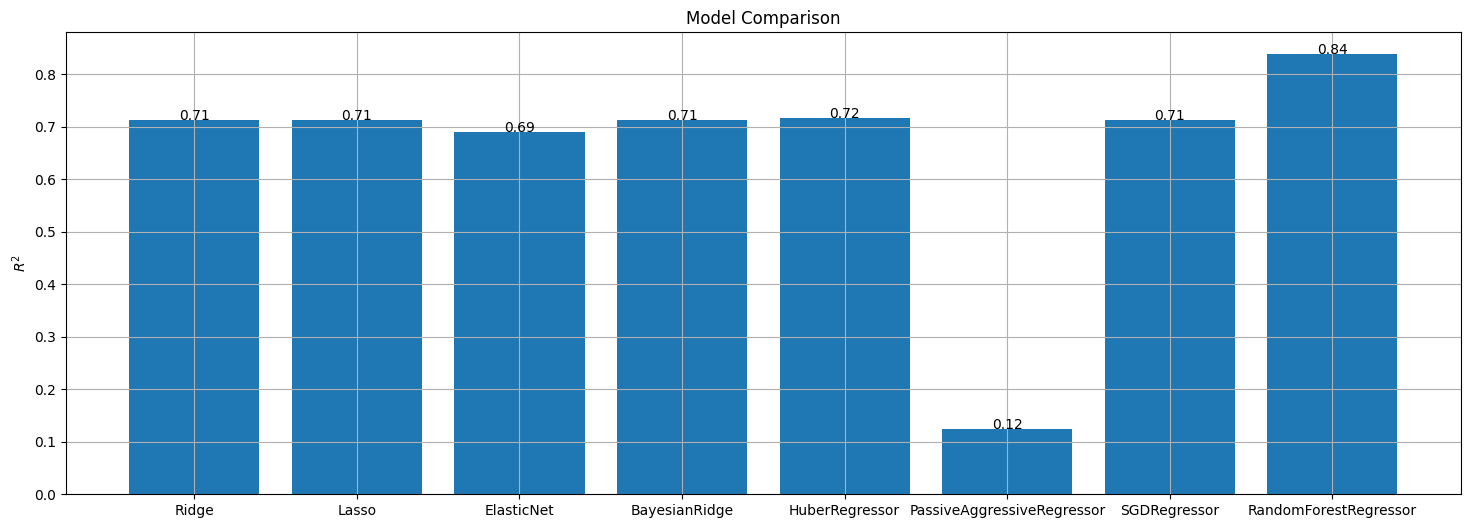

In [50]:
plt.figure(figsize=(18, 6))
bars = plt.bar(test_scores.keys(), test_scores.values())
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center')

plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()
plt.show()